VIII.1 Importieren und grafische Darstellung der Messdaten
==

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# Zälrohrspannung
U = np.array([460, 485, 510, 535, 560, 585])
# Ereignisse
N = np.array([2033, 2028, 2022, 2103, 2047, 2105])
Delta_N = np.sqrt(N)

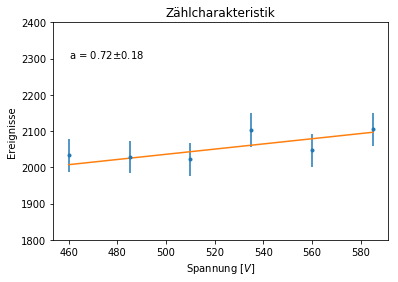

In [3]:
# Plot
plt.errorbar(U, N, yerr = Delta_N, fmt = '.')
plt.xlabel('Spannung [$V$]')
plt.ylabel('Ereignisse')
plt.title('Zählcharakteristik')
plt.ylim(1800,2400)

# Define fit
def line(x, a, b):
    return a * x + b

# Fit
popt, pcov = curve_fit(line, U[1:], N[1:])
plt.plot(U, line(U, *popt))
plt.savefig('V251Diagramm1.png')
plt.text(460, 2300, 'a = ' + str(round(popt[0],2)) + '$\pm$' + str(round(pcov[0,0],2)))
plt.show()

VIII.2 Plateaubereich des Zählrohrs
====

In [4]:
# Rechnungen
n100 = 26488
Delta_n100 = np.sqrt(n100)
n0 = 8634
Delta_n0 = np.sqrt(n0)
Delta_V = 100
a = (n100 - n0) / Delta_V
Delta_a = ((n100 + Delta_n100) - (n0 - Delta_n0)) / 90


print (a, Delta_a)

178.54 201.2185629324779


VIII.3 Hohe mittlere Ereigniszahl
===

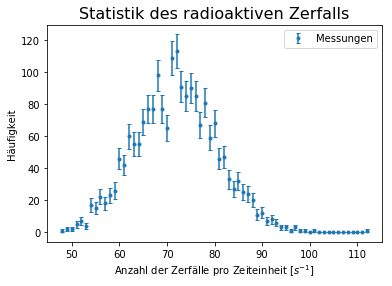

In [5]:
# Importieren der Daten
anzahl, haeufigkeit = np.loadtxt('data/V251JuanundMike.dat', unpack=True) 
fehler = np.sqrt(haeufigkeit)

# Plot
plt.errorbar(anzahl, haeufigkeit, yerr = fehler, fmt = '.', capsize = 2, 
             label = 'Messungen')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [$s^{-1}$]')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls', size = 16)
plt.legend(loc = 'upper right')
plt.savefig('V251Diagramm2.png')
plt.show()

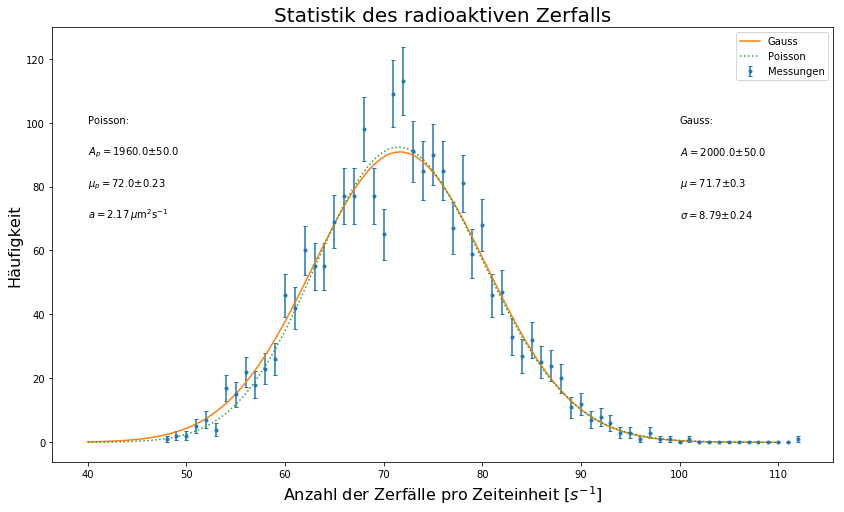

In [14]:
# Gauss-Verteilung
from numpy import exp, pi, sqrt


def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A / (sqrt(2 * pi) * sig) * exp( - (x - mu) ** 2 / 2 / sig ** 2)

# Curve fit
popt, pcov = curve_fit(gaussian, anzahl[13:-13], haeufigkeit[13:-13], 
                       p0 = [2000, 72, 8], sigma = fehler[13:-13])

# Poisson-Verteilung
from scipy.special import gamma 


def poisson(x, A_p, mu_p):
    return A_p * exp(-mu_p) * mu_p ** x / gamma(x + 1)

# Curve fit
popt_p, pcov_p = curve_fit(poisson, anzahl[13:-13], haeufigkeit[13:-13],
                           p0 = [2000, 72], sigma = fehler[13:-13])

# Plot
plt.figure(figsize = (14,8))
plt.errorbar(anzahl, haeufigkeit, yerr = fehler, fmt = '.', capsize = 2, 
             label = 'Messungen')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [$s^{-1}$]', size = 16)
plt.ylabel('Häufigkeit', size = 16)
plt.title('Statistik des radioaktiven Zerfalls', size = 20)
x = np.linspace(40, 110, 100)
plt.plot(x, gaussian(x, *popt), label = 'Gauss')
plt.plot(x, poisson(x, *popt_p), label = 'Poisson',linestyle = ':') 
plt.legend(loc = 'upper right')
plt.text(100,100, 'Gauss:')
plt.text(100,90, '$A = $' + str(round(popt[0],-1)) + '$\pm$' + str(round(sqrt(pcov[0][0]),-1)))
plt.text(100,80, '$\mu = $' + str(round(popt[1],1)) + '$\pm$' + str(round(sqrt(pcov[1,1]),1)))
plt.text(100,70, '$\sigma = $' + str(round(popt[2],2)) + '$\pm$' + str(round(sqrt(pcov[2,2]),2)))
plt.text(40,100, 'Poisson:')
plt.text(40,90, '$A_p = $' + str(round(popt_p[0],-1)) + '$\pm$' + str(round(sqrt(pcov_p[0,0]),-1)))
plt.text(40,80, '$\mu_p = $' + str(round(popt_p[1],1)) + '$\pm$' + str(round(sqrt(pcov_p[1,1]),2)))
plt.savefig('V251Diagramm3.png')
plt.show()

In [7]:
print("Gaussfit:")
print("A=",popt[0], ", Standardfehler=", sqrt(pcov[0][0])) 
print("mu=",popt[1], ", Standardfehler=", sqrt(pcov[1][1])) 
print("sig=",popt[2], ", Standardfehler=", sqrt(pcov[2][2])) 
print("Poissonfit:")
print("A_p=",popt_p[0], ", Standardfehler=", sqrt(pcov_p[0][0])) 
print("mu_p=",popt_p[1], ", Standardfehler=", sqrt(pcov_p[1][1]))

Gaussfit:
A= 2001.9388471962243 , Standardfehler= 54.37382453636759
mu= 71.65294574662273 , Standardfehler= 0.31423651419017606
sig= 8.792232555005752 , Standardfehler= 0.24428703085958767
Poissonfit:
A_p= 1963.0798563911599 , Standardfehler= 47.6676385684735
mu_p= 72.0143865534365 , Standardfehler= 0.23494516817562683


In [8]:
#Gauss:
chi2_g = np.sum((gaussian(anzahl[13:-13], *popt) - haeufigkeit[13:-13]) ** 2 / 
                fehler[13:-13] ** 2)
dof_g = len(anzahl[13:-13])-3 #dof:degrees of freedom, Freiheitsgrad 
chi2_red_g = chi2_g / dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)
#Poisson:
chi2_p = np.sum((poisson(anzahl[13:-13], *popt_p) - haeufigkeit[13:-13]) ** 2 /
                fehler[13:-13] ** 2)
dof_p = len(anzahl[13:-13]) - 2 #poisson hat nur 2 Parameter 
chi2_red_p = chi2_p / dof_p
print("chi2_p=", chi2_p) 
print("chi2_red_p=",chi2_red_p)

from scipy.stats import chi2


#Gauss: 
prob_g = round(1 - chi2.cdf(chi2_g,dof_g),2) * 100 
#Poisson: 
prob_p = round(1 - chi2.cdf(chi2_p,dof_p),2) * 100 


print("Wahrscheinlichkeit Gauss=", prob_g,"%") 
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

chi2_g= 37.166078731750055
chi2_red_g= 1.032391075881946
chi2_p= 37.84642683000824
chi2_red_p= 1.0228764008110336
Wahrscheinlichkeit Gauss= 42.0 %
Wahrscheinlichkeit Poisson= 43.0 %


VIII.4 Kleine mittlere Ereigniszahl
===

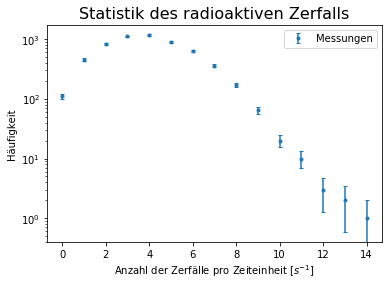

In [9]:
# Importieren der Daten
anzahl, haeufigkeit = np.loadtxt('data/V251.2JuanundMike.dat', unpack=True) 
fehler = np.sqrt(haeufigkeit)

# Plot
plt.errorbar(anzahl, haeufigkeit, yerr = fehler, fmt = '.', capsize = 2, 
             label = 'Messungen')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [$s^{-1}$]')
plt.ylabel('Häufigkeit')
plt.yscale('log')
plt.title('Statistik des radioaktiven Zerfalls', size = 16)
plt.legend(loc = 'upper right')
plt.savefig('V251Diagramm4.png')
plt.show()

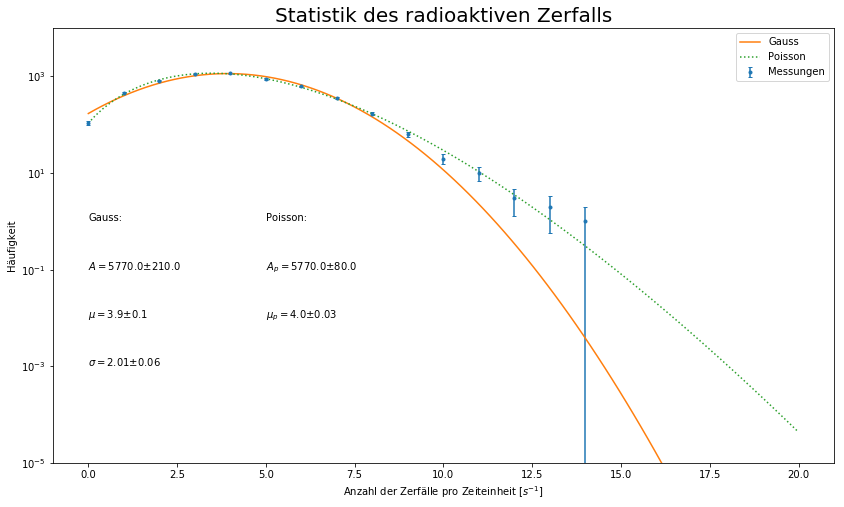

In [10]:
# Curve fit
popt, pcov = curve_fit(gaussian, anzahl[:], haeufigkeit[:], 
                       p0 = [2000, 5, 8], sigma = fehler[:])
# Curve fit
popt_p, pcov_p = curve_fit(poisson, anzahl[:], haeufigkeit[:],
                           p0 = [2000, 5], sigma = fehler[:])


# Plot
plt.figure(figsize = (14,8))
plt.yscale('log')
plt.ylim((10 ** -5, 10 ** 4))
plt.errorbar(anzahl, haeufigkeit, yerr = fehler, fmt = '.', capsize = 2, 
             label = 'Messungen')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit [$s^{-1}$]')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls', size = 20)
x = np.linspace(0, 20, 100)
plt.plot(x, gaussian(x, *popt), label = 'Gauss')
plt.plot(x, poisson(x, *popt_p), label = 'Poisson',linestyle = ':') 
plt.legend(loc = 'upper right')
plt.text(0, 10 ** 0, 'Gauss:')
plt.text(0, 10 ** -1, '$A = $' + str(round(popt[0],-1)) + '$\pm$' + str(round(sqrt(pcov[0][0]),-1)))
plt.text(0, 10 ** -2, '$\mu = $' + str(round(popt[1],1)) + '$\pm$' + str(round(sqrt(pcov[1,1]),1)))
plt.text(0, 10 ** -3, '$\sigma = $' + str(round(popt[2],2)) + '$\pm$' + str(round(sqrt(pcov[2,2]),2)))
plt.text(5, 10 ** 0, 'Poisson:')
plt.text(5, 10 ** -1, '$A_p = $' + str(round(popt_p[0],-1)) + '$\pm$' + str(round(sqrt(pcov_p[0,0]),-1)))
plt.text(5, 10 ** -2, '$\mu_p = $' + str(round(popt_p[1],1)) + '$\pm$' + str(round(sqrt(pcov_p[1,1]),2)))
plt.savefig('V251Diagramm5.png')
plt.show()

In [11]:
#Gauss:
chi2_g = np.sum((gaussian(anzahl[:], *popt) - haeufigkeit[:]) ** 2 / 
                fehler[:] ** 2)
dof_g = len(anzahl[:])-3 #dof:degrees of freedom, Freiheitsgrad 
chi2_red_g = chi2_g / dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)
#Poisson:
chi2_p = np.sum((poisson(anzahl[:], *popt_p) - haeufigkeit[:]) ** 2 /
                fehler[:] ** 2)
dof_p = len(anzahl[:]) - 2 #poisson hat nur 2 Parameter 
chi2_red_p = chi2_p / dof_p
print("chi2_p=", chi2_p) 
print("chi2_red_p=",chi2_red_p)

from scipy.stats import chi2


#Gauss: 
prob_g = round(1 - chi2.cdf(chi2_g,dof_g),2) * 100 
#Poisson: 
prob_p = round(1 - chi2.cdf(chi2_p,dof_p),2) * 100 


print("Wahrscheinlichkeit Gauss=", prob_g,"%") 
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

chi2_g= 90.93787681960904
chi2_red_g= 7.578156401634087
chi2_p= 14.391601465458244
chi2_red_p= 1.107046266573711
Wahrscheinlichkeit Gauss= 0.0 %
Wahrscheinlichkeit Poisson= 35.0 %
